#  IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Any use of **auto-generated code** must be clearly identified, along with the tool or software used to generate it. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Tuesday, October 8 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


In [42]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [43]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


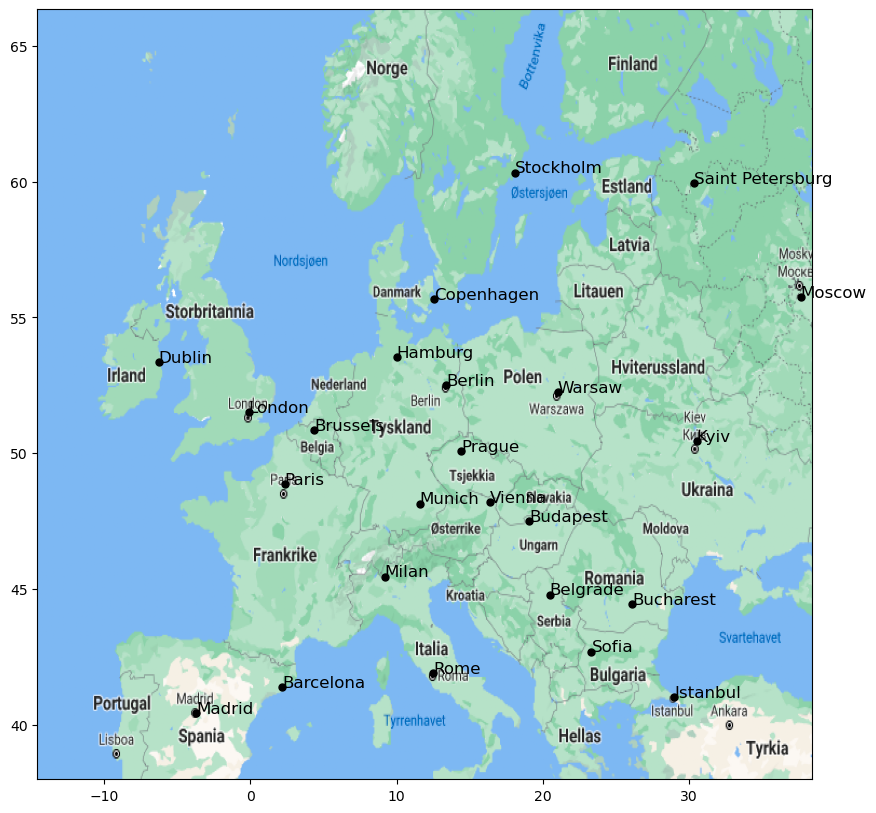

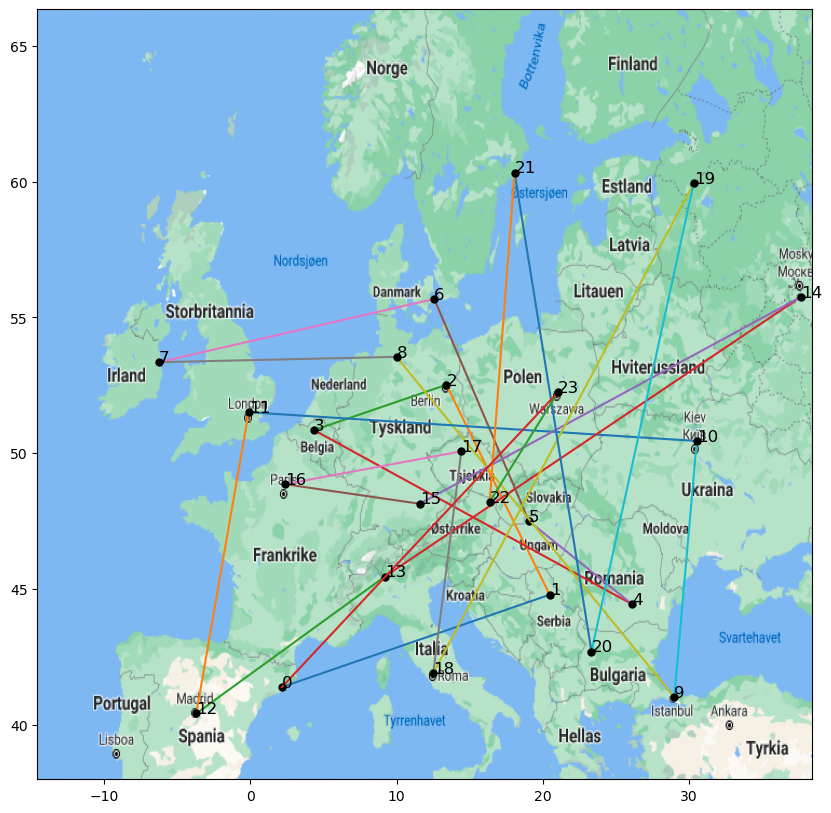

In [44]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

Disclaimer: I tried to keep things as tidy as possible. Where I defined a lot of utility functions in the part about exhaustive search, which are used later in the all of the search methods.
The segment about exhaustive search could have contained less code in the segment concerned with actually running the exhaustive search-method. See hill climbing and GA, where I implemented own code to print, plot the solutions. I could also have created one general routine for both the cityTour()- and stat-functions, but I did not have a time to fully optimise these.
chatGPT was used in parts of the code where I was stuck. See functions for tournament_selection() and GA_TSP. Additionally, I was inspired by Maciej SonnyFixit's on github(see: https://github.com/SonnyFixit/Travelling_salesman_problem/blob/main/TSP_Algorithm/TSP_Genetic_Algorithm.py) implementation of the PMX crossover, where I extended it for the use case for 2 offsprings.
I chose to use the PMX crossover for  generating offsprings because it has become
one of the most widely used operators for adjacency-type problems (chapter 4.5 of the Eiben and Smith textbook). Lastly, the inversion mutation was implemented because when working with adjacency-based problems, as for TSP, Eiben and Smith mention that this can cause a numbers of links to be broken (chapter 4.5 of the Eiben and Smith textbook), hence I chose to implement the inversion mutation for GA as it is more commonly used.

The programs can be run straight directly as everything is called.

--- 0.0010175704956054688 seconds ---
Best Path (city names): ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels']
Minimum Distance: 5018.81


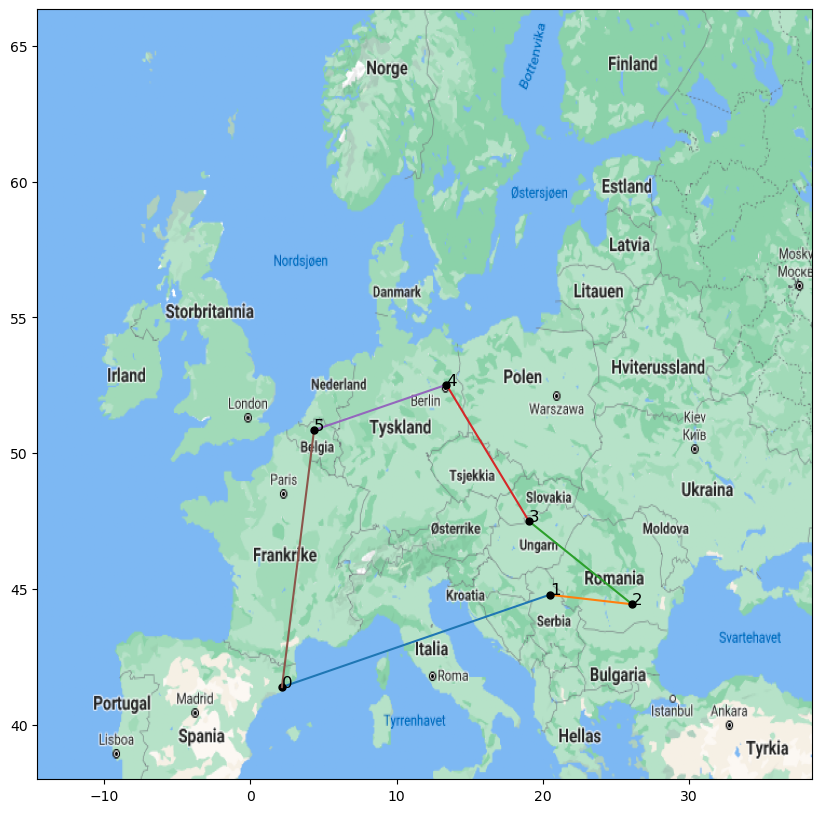

--- 7.689664840698242 seconds ---
Best Path (city names): ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']
Minimum Distance: 7486.31


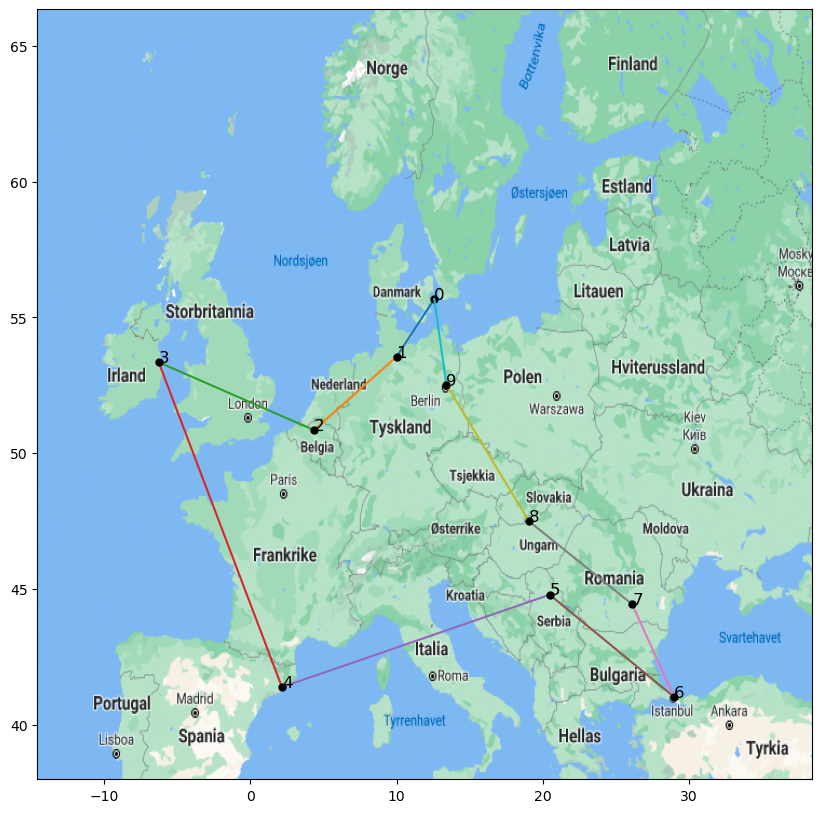

In [45]:
# Implement the algorithm here



import itertools
import time
#import pandas as pd

#displaying matrix in a neat way for troubleshooting
#designmatrix= pd.DataFrame(data) #useful for formatted matrix representation
#display(designmatrix)

#Set up for routine functions used in the whole assigment___________________________

# Slice the data-matrix -> dimensionality reduction given by no_cities 
def slice_matrix(data, no_cities):
    cities = []
    for row in data[:no_cities+1]:
        add_row = []                                #row containing distances
        for col in row[:no_cities+1]:
            add_row.append(col)                     #add column data to the row 
        cities.append(add_row)                      #add row to the search spaces-matrix
    return cities


#Preprocess distance matrix - convert distances from strings to floats
def matrixFloatConverter(data):                 
    search_space = []                           
    for row in data[1:]:                      #first row contains city names
        distance_row = []                       
        for col in row:
            distance_row.append(float(col))        #convert distance from string to float
        search_space.append(distance_row)          #add the row to the returned matrix
    return search_space


#Calculate distance score
def total_distance(path, data):
    possibleDistanceTravelled = 0
    for i in range(len(path) - 1):
        possibleDistanceTravelled += data[path[i]][path[i+1]]

    # Add distance from last city back to the first city
    possibleDistanceTravelled += data[path[-1]][path[0]]  # Return to the start city
    return possibleDistanceTravelled

#Map list of cities: int -> strings, converter to use list in plot_plan-function
def nCities_tour(city_order, nCities):
    best_city_path = [nCities[0][i] for i in city_order]
    return best_city_path

#Set up of routine functions ends here___________________________

# Exhaustive search function for the TSP-problem
def exhaustive_search(data):
    start_time = time.time()
    n = len(data)                       # Number of cities
    nCities = itertools.permutations(range(n))  # Generate all permutations of city paths
    distanceTravelled = float('inf')            # Start with an infinite distance. This guarantees that we find a better distances
    best_path = 0.0

    for cities in nCities:
        possibleDistanceTravelled = total_distance(cities, data)  
        #evaluate if this path is the optimal solution      
        if possibleDistanceTravelled < distanceTravelled:         
            distanceTravelled = possibleDistanceTravelled
            best_path = cities
    print("--- %s seconds ---" % (time.time() - start_time))
    return best_path, distanceTravelled



# Do the exhaustive search for both 6 and 10 cities

short_city_tour = slice_matrix(data, 6)         #6 cities
long_city_tour = slice_matrix(data, 10)         #10 cities

# Exhaustive search on 6 cities 
best_short_sol, optimal_short_sol = exhaustive_search(matrixFloatConverter(short_city_tour))
best_short_sol = nCities_tour(best_short_sol,short_city_tour)
print(f"Best Path (city names): {best_short_sol}")
print(f"Minimum Distance: {optimal_short_sol:.2f}")
plot_plan(best_short_sol)

# Exhaustive search on 10 cities 
best_long_sol, optimal_long_sol = exhaustive_search(matrixFloatConverter(long_city_tour))
best_long_sol = nCities_tour(best_long_sol,long_city_tour)
print(f"Best Path (city names): {best_long_sol}")
print(f"Minimum Distance: {optimal_long_sol:.2f}")
plot_plan(best_long_sol)



What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [46]:
# Answer
#Shortest path was: 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin'
# It took the program 8.0s to find it.
#Assume that 1. a modern computer about 1 million = 10^6 permutations per seconds
#            2. permutations: 24!= 620,448,401,733,239,439,360,000 = 6.20*10^23

time_in_sec = 6.2*10**17
years = time_in_sec/(60*60*24*365)
print(f'{years:.1f}')
# Time in seconds: 6.2*10^17sec
# convert to years: 196 600 710 29.9 -> it would take roughly 196 millions years to perform exhaustive search on all cities


19660071029.9


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

--- 0.03248238563537598 seconds ---
--- 0.025569677352905273 seconds ---
--- 0.01892709732055664 seconds ---
--- 0.02536630630493164 seconds ---
--- 0.024444103240966797 seconds ---
--- 0.022255897521972656 seconds ---
--- 0.02119612693786621 seconds ---
--- 0.02434229850769043 seconds ---
--- 0.02799510955810547 seconds ---
--- 0.027604103088378906 seconds ---
--- 0.02313542366027832 seconds ---
--- 0.020741701126098633 seconds ---
--- 0.02446889877319336 seconds ---
--- 0.024214744567871094 seconds ---
--- 0.01856851577758789 seconds ---
--- 0.02440023422241211 seconds ---
--- 0.025099754333496094 seconds ---
--- 0.027634382247924805 seconds ---
--- 0.028916358947753906 seconds ---
--- 0.02188587188720703 seconds ---
Here are the scores for 20 runs: 

Worst path scores: 8377.24
Optimal path scores: 7486.31
Avg. score: 7641.15
Std: 262.50


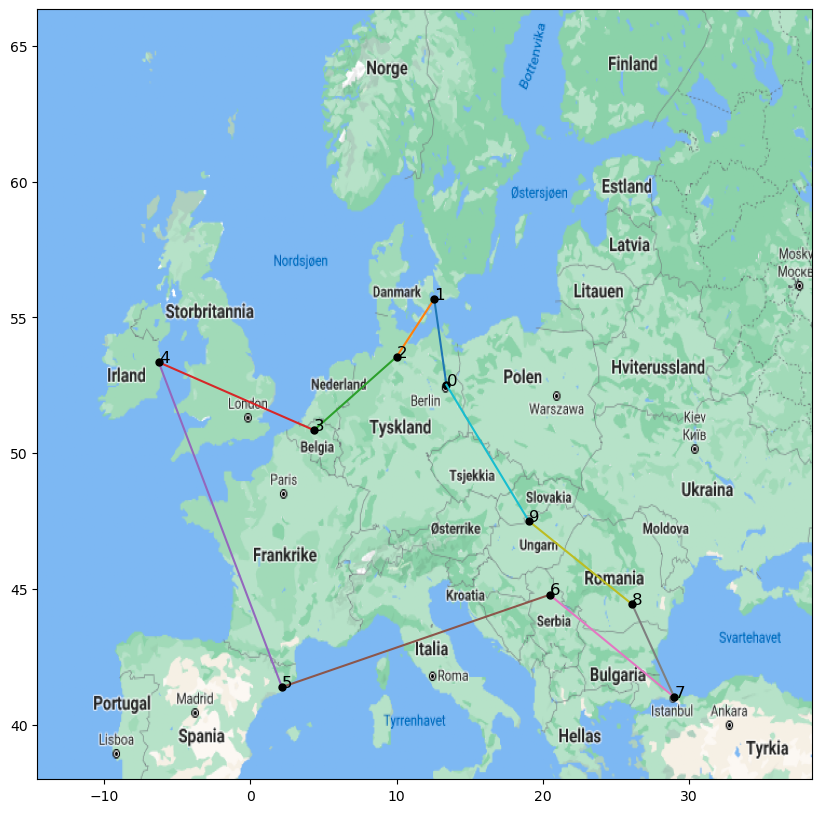

--- 0.030599594116210938 seconds ---
--- 0.0330958366394043 seconds ---
--- 0.028477191925048828 seconds ---
--- 0.0240170955657959 seconds ---
--- 0.03293728828430176 seconds ---
--- 0.029067516326904297 seconds ---
--- 0.028218746185302734 seconds ---
--- 0.02956557273864746 seconds ---
--- 0.030694246292114258 seconds ---
--- 0.028413057327270508 seconds ---
--- 0.0284576416015625 seconds ---
--- 0.029139041900634766 seconds ---
--- 0.025649309158325195 seconds ---
--- 0.028643369674682617 seconds ---
--- 0.030087947845458984 seconds ---
--- 0.032858848571777344 seconds ---
--- 0.028856754302978516 seconds ---
--- 0.024454116821289062 seconds ---
--- 0.025529861450195312 seconds ---
--- 0.029521703720092773 seconds ---
Here are the scores for 20 runs: 

Worst path scores: 17733.02
Optimal path scores: 13470.02
Avg. score: 15120.64
Std: 1048.78


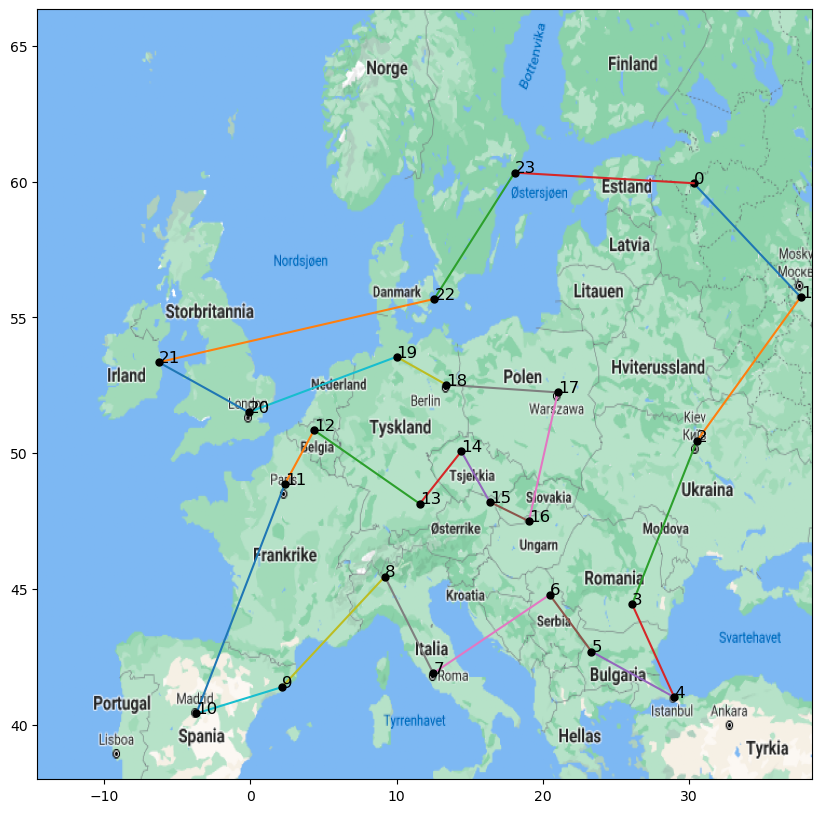

In [47]:
#Set up for helper functions used in the "hill climbing"-method___________________________

# Generate a random solution (tour) by shuffling city order
def randomize_sol(nCities):
    rand_nCities = np.arange(nCities)
    np.random.shuffle(rand_nCities)
    return rand_nCities

# Swap two cities to create a new neighboring solution
def swap_cities(path):
    new_route = path.copy()
    i, j = np.random.choice(len(path), size=2, replace=False)
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Hill Climbing Algorithm
def hill_climbing(nCities, data, max_iters=1200):
    start_time = time.time()
    # Step 1: Start with a random solution and score
    current_solution = randomize_sol(nCities)
    current_distance = total_distance(current_solution, data)   #total_distance is from previous section
    
    for iteration in range(max_iters):
        # Step 2: Generate a neighboring solution by swapping two cities
        neighbour_solution = swap_cities(current_solution)
        neighbour_distance = total_distance(neighbour_solution, data)
        
        # Step 3: If the neighboring solution is better, update it to current solution
        if neighbour_distance < current_distance:
            current_solution = neighbour_solution
            current_distance = neighbour_distance
            #print(f"Iteration {iteration}: New better solution found with distance {current_distance}")
    
    # Return the best found solutions
    optimal_solution = current_solution
    optimal_distance = current_distance
    print("--- %s seconds ---" % (time.time() - start_time))
    return optimal_solution, optimal_distance

#Routine functions used both in hillclimbing and GA -search, where GA is slightly modified

def cityTour(func,nCities,data):
    city_tour = slice_matrix(data,nCities)
    city_tour = matrixFloatConverter(city_tour)
    best_20_distances = []
    best_20_sol = []#np.empty(shape=(20,nCities), dtype='object')
    i=0
    while i != 20:
         best_solution, best_distance = func(nCities, city_tour)
         best_20_distances.append(best_distance)
         best_20_sol.append(best_solution)
         i+=1
    return best_20_distances,best_20_sol

def stats(distance_list, sol_list, nCities):
    max = np.max(distance_list)
    min = np.min(distance_list)
    avg = sum(distance_list)/len(distance_list)
    index_optimal_val = distance_list.index(min)
    std = np.std(distance_list,dtype=np.float64)
    print('Here are the scores for 20 runs: \n')
    print(f'Worst path scores: {max:.2f}')
    print(f'Optimal path scores: {min:.2f}')
    print(f'Avg. score: {avg:.2f}')
    print(f'Std: {std:.2f}')
    plot_plan(nCities_tour(sol_list[index_optimal_val],nCities))

#Set up ends here____________________________________

short_nCities = 10
long_nCities = 24
short_city_tour = slice_matrix(data, short_nCities)
short_city_tour_f = matrixFloatConverter(short_city_tour)
long_city_tour = slice_matrix(data, long_nCities)
long_city_yout_f = matrixFloatConverter(long_city_tour)

#10 cities
best_distance, best_sol = cityTour(hill_climbing,short_nCities,data)
stats(best_distance,best_sol, short_city_tour)

#24 cities
best_distance, best_sol = cityTour(hill_climbing, long_nCities,data)
stats(best_distance,best_sol, long_city_tour)

#The hillclimber search method spends much shorter time. For both runs for 10 and 24 cities it uses 1.8s.
#Pay in mind that the duration is for 40 runs. 20 for each city tour run.



## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

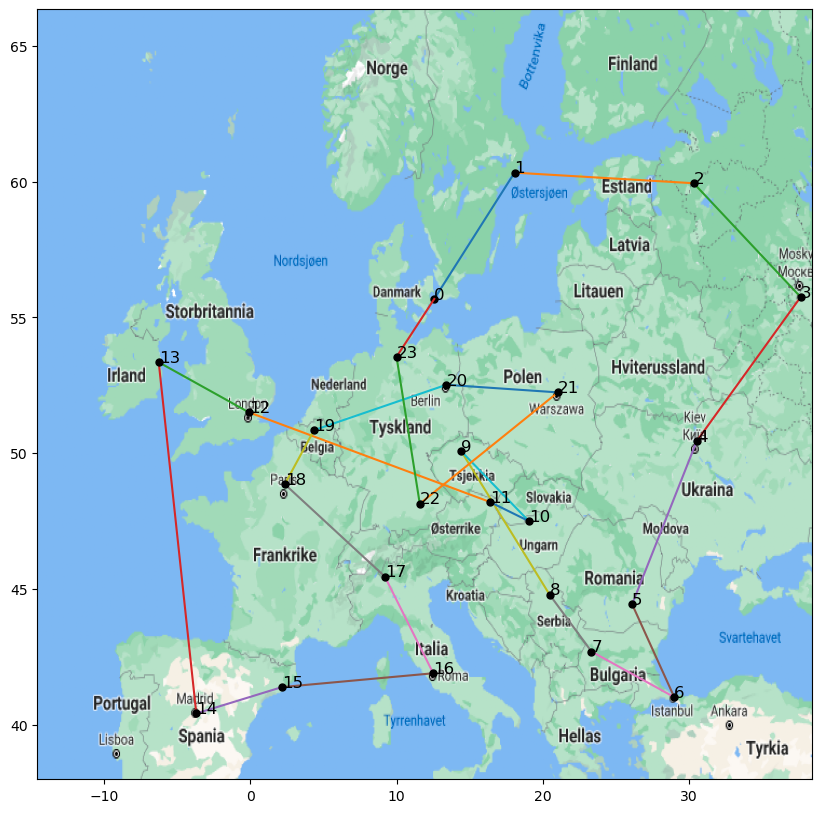

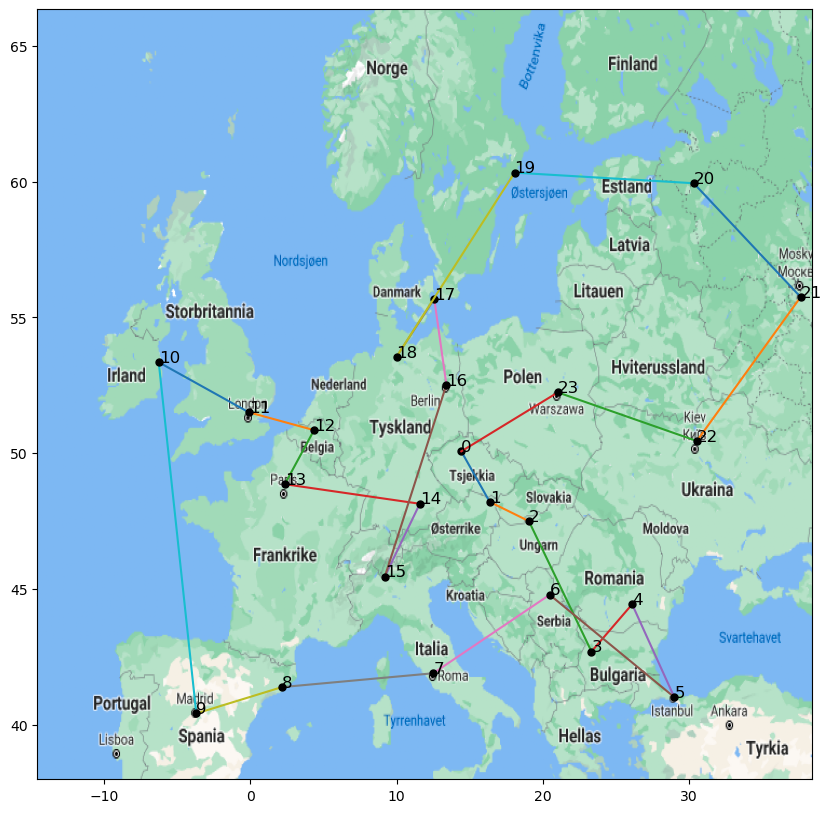

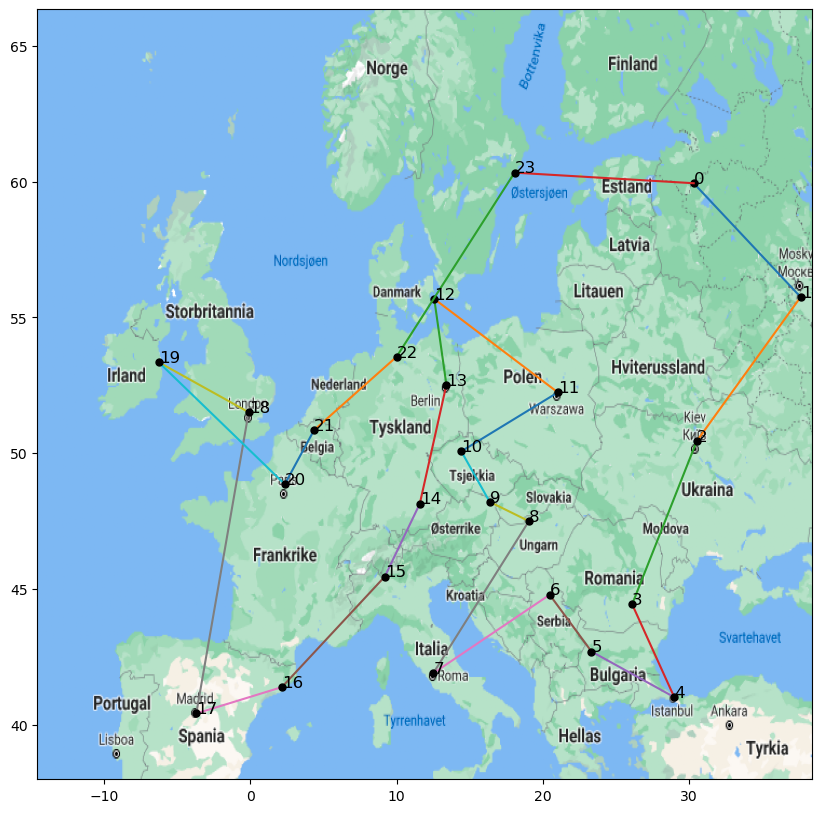

Population_size= 100,200,300____generations=100____mutationrate=0.3
Population size = 100
Worst path scores: 16840.07
Optimal path scores: 14780.49
Avg. score: 15464.07
Std: 477.20

Population size = 200
Worst path scores: 16895.92
Optimal path scores: 13833.29
Avg. score: 15337.68
Std: 631.58

Population size = 300
Worst path scores: 16895.92
Optimal path scores: 13780.65
Avg. score: 15221.02
Std: 665.60



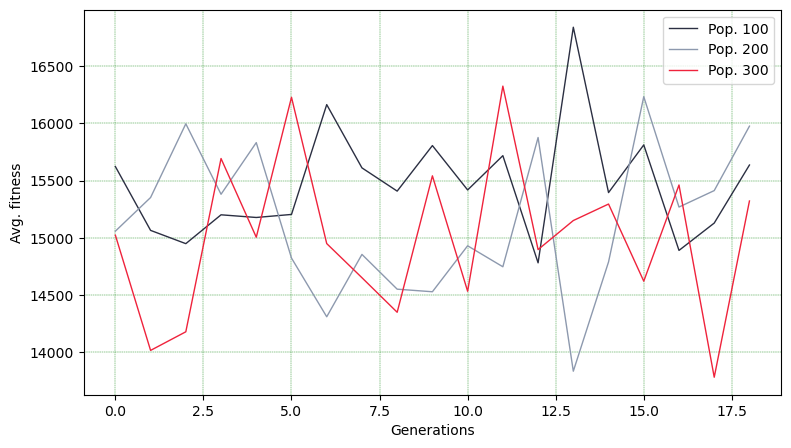

In [48]:
# Implement the algorithm here

import random
import matplotlib.pyplot as plt

#Set up-functions_____________

#PMC Crossover function
# I was stuck here and borrowed the routine from:
# https://github.com/SonnyFixit/Travelling_salesman_problem/blob/main/TSP_Algorithm/TSP_Genetic_Algorithm.py
# I scaled up the routine to include 2 offsprings/children (see PMX crossover function)

def PMX_crossover(parent1, parent2):          #partially mapped crossover
    size = len(parent1)
    p1, p2 = random.sample(range(size),2)

    #make sure that p1<p2
    if p1 > p2:                            
        p1,p2 = p2,p1   

    #Copy segment from parent over to respective offspring/child
    child1, child2 = parent2[p1:p2+1], parent1[p1:p2+1]

    child1_set = set(child1)
    child2_set = set(child2)
   
    #Mapping from parent to child
    for i in range(size):
        if i<p1 or i>p2:

            #Mapping for child1
            gene = parent2[i]
            while gene in child1_set:
                index = parent2.index(gene)
                gene = parent2[(index+1)%size]
            child1.append(gene)
            child1_set.add(gene)
            #Mapping for child2
            gene = parent1[i]
            while gene in child2_set:
                index = parent1.index(gene)
                gene = parent1[(index+1)%size]
            child2.append(gene)
            child2_set.add(gene)
    return child1, child2

#Inverse Mutation
def inverse_mutation(path):
    size = len(path)
    # Select two random points - reverse the numbers in the interval
    p1, p2 = random.sample(range(size),2)
    path[p1:p2+1] = path[p1:p2+1][::-1]
    return path

#Disclaimer I had problems finding a routine for tournament selection and GA for the TSP
#Here ChatGPT was used

#Tournament selection
def tournament_selection(population,distances, k = 4):
    selected = random.sample(list(zip(population, distances)), k)
    selected.sort(key=lambda x: x[1])  # Sort by fitness (distance), lower is better
    return selected[0][0]  # Return the route with the best fitness

#The GA algortihm
def genetic_algorithm_tsp(distance_matrix, population_size=100, generations=100, mutation_rate=0.3):
    #start_time = time.time()
    num_cities = len(distance_matrix)
    
    # Initialize population with random routes
    population = [random.sample(range(num_cities), num_cities) for _ in range(population_size)]
    
    
    # Main loop
    for generation in range(generations):
        # Calculate fitness (total distance) for each route in the population
        fitnesses = [total_distance(route, distance_matrix) for route in population]
        
        
        # Generate a new population
        new_population = []
        while len(new_population) < population_size:
            # Selection
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            
            # Crossover (PMX)
            child1, child2 = PMX_crossover(parent1, parent2)
            
            # Mutation
            if random.random() < mutation_rate:
                child1 = inverse_mutation(child1)
            if random.random() < mutation_rate:
                child2 = inverse_mutation(child2)
            
            # Add offspring to the new population
            new_population.extend([child1, child2])
        
        # Replace the old population with the new population
        population = new_population[:population_size]
    
    # After all generations, return the best route found
    best_route = min(population, key=lambda x: total_distance(x, distance_matrix))
    #print("--- %s seconds ---" % (time.time() - start_time))
    return best_route, total_distance(best_route, distance_matrix)


# population size = 100,200,300, generation = 100, mutation_rate=0.3
#Works similarly to the cityTour-function defined for the hillclimbing algorithm.
#The difference is that plot_plan is now baked into cityTour_GA and not the stat function
def cityTour_GA(nCities,distanceMatrix):
    city_tour1 = slice_matrix(distanceMatrix,nCities)
    city_tour = matrixFloatConverter(city_tour1)
    best_20_distances = []
    best_20_sol = []
    for j in range(3):
        i=0
        while i != 20:
            best_solution, best_distance = genetic_algorithm_tsp(city_tour, population_size=(j+1)*100)
            best_20_distances.append(best_distance)
            best_20_sol.append(best_solution)
            i+=1

        #Plot the graph for each run
        min = np.min(best_20_distances)
        min_index = best_20_distances.index(min)
        plot_plan(nCities_tour(best_20_sol[min_index],city_tour1))
    return best_20_distances,best_20_sol

#assume that len(distances_list) = 60

#Similar to the stat function, from previous task, but this one has more functionality than the previous
def stats_GA(distance_list):    
    twenty = np.array(distance_list[0:19])
    forty = np.array(distance_list[20:39])
    sixty = np.array(distance_list[40:59])
    print("Population_size= 100,200,300____generations=100____mutationrate=0.3")
    for i in range(3):      
        max = np.max(distance_list[i:(i*19)+19+i])
        min = np.min(distance_list[i:(i*19)+19+i])
        avg = sum(distance_list[i:(i*19)+19+i])/len(distance_list[i:(i*19)+19+i])
        ##index_optimal_val = distance_list.index(min)
        std = np.std(distance_list[i:(i*19)+19+i],dtype=np.float64)

        print(f'Population size = {100*(i+1)}')
        print(f'Worst path scores: {max:.2f}')
        print(f'Optimal path scores: {min:.2f}')
        print(f'Avg. score: {avg:.2f}')
        print(f'Std: {std:.2f}\n')
        
    #Plot graph as a function of generations and fitnesses/distances
    x = np.array([i for i in range(19)])
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.set_ylabel("Avg. fitness")
    ax.set_xlabel("Generations")
    ax.plot(x,twenty, color = "#2B2F42", linewidth = 1, label = 'Pop. 100')
    ax.plot(x,forty, color = "#8D99AE", linewidth = 1, label= 'Pop. 200')
    ax.plot(x,sixty, color = "#EF233C", linewidth = 1, label = 'Pop. 300')
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.3)
    ax.legend()
    plt.show()

#End of set-up____________

#Function call

#24 cities
best_Ldist, best_Lsol = cityTour_GA(24,data)
stats_GA(best_Ldist)



Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [49]:
# Answer
#For both 10 and 24 cities I used the following: 
# #Population size = 100, generations = 100, mutation rate = 0.3

#10 CITIES - Running once without the stat_GA and cityTour helper-functions

#Runtime: GA: 0.31s; Exhaustive search: 8.0s
#NO. tours: 
#Some details first
# GA loops one main loop for generations = 100
# And one while-loop when new_population < population, each =100

#I take it the number of evaluted tours are then 100*100= 10000
#This number is also unchanged for 24 cities, since I assume that each tour represents an individual.
#Meaning that a higher number of cities means just longer tour, not more individuals.
#Also the PMX crossover takes in 2 parents and returns 2 offsprings, making the ratio 1:1.


#24 CITIES; GA: 5.8s ;Exhaustive search: undefined -> or as I calculated earlier: 196 millions years
#GA works definetely better for TSP when #cities are 24. Printing the population
